In [1]:
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Load processed data
folder = "../dataset"
processed_data_path = os.path.join(folder, "processed_data.csv")
data = pd.read_csv(processed_data_path)


In [3]:
# Splitting Data into Features and Target Variable
X = data.drop('Class', axis=1)
y = data['Class']

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [6]:
# Random Forest Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [7]:
# Evaluation Metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

# Evaluate Logistic Regression Model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluate Random Forest Model
evaluate_model(y_test, y_pred_rf, "Random Forest")



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Confusion Matrix:
[[83213  2082]
 [ 6835 78459]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix:
[[85277    18]
 [    0 85294]]


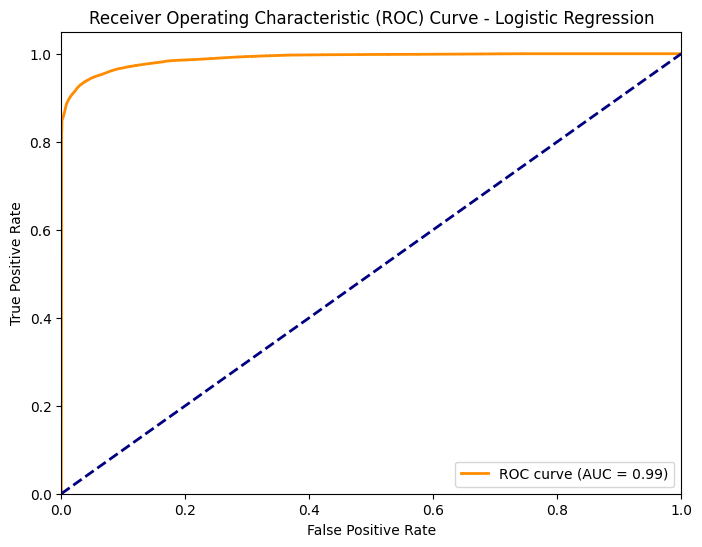

In [8]:
# ROC Curve for Logistic Regression
# Calculate ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



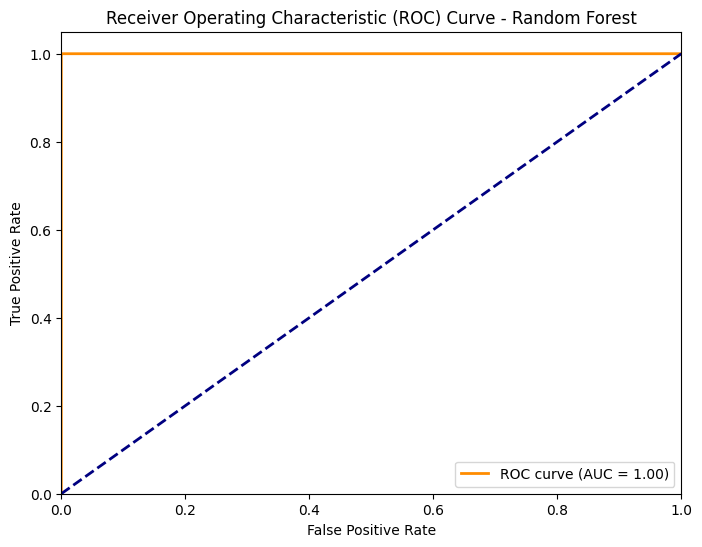

In [9]:
# ROC Curve for Random Forest
# Calculate ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [10]:
# Create Models directory if it doesn't exist
models_dir = '../Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [11]:
# Save the Logistic Regression Model
lr_model_path = os.path.join(models_dir, 'fraud_detection_logistic_regression_model.pkl')
joblib.dump(model_lr, lr_model_path)

['../Models\\fraud_detection_logistic_regression_model.pkl']

In [12]:
# Save the Random Forest Model
rf_model_path = os.path.join(models_dir, 'fraud_detection_random_forest_model.pkl')
joblib.dump(model_rf, rf_model_path)



['../Models\\fraud_detection_random_forest_model.pkl']

: 